In [39]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import random

In [2]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

mu, sigma = 1, 0.4
s1 = np.random.normal(mu, sigma, 1000)

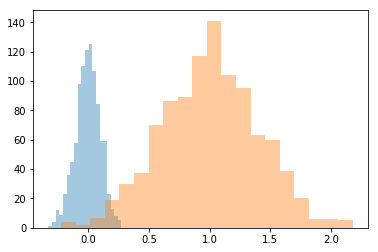

In [166]:
sns.distplot(s, bins=20, kde=False)
sns.distplot(s1, bins=20, kde=False)

In [167]:
data = np.append(s,s1)

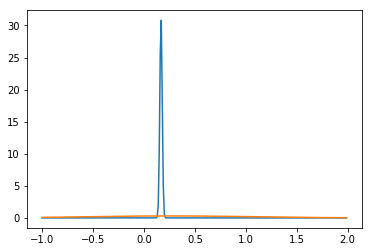

In [246]:
mm = gmm(2)
x = np.arange(-1,  2, .01)

mm.plot(x)

In [248]:
class gsn: 
    def __init__(self, mean, std, mcf):
        self.mean, self.std, self.mcf = mean, std, mcf
        
    def func(self):
        return stats.norm(self.mean, self.std)
    
    def pdf(self, x):
        return self.mcf * self.func().pdf(x)
    
    def plot(self, x):
        return plt.plot(x, self.pdf(x))
    
    

0.13655885292872133
0.5062870747584612
0.01766882349734126
0.9823311765026588


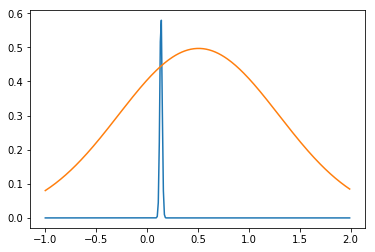

In [254]:
mm.update(data)
mm.plot(x)

2000